In [30]:
#Project - Pallavi Singla, 991524414
#installing pycaret
!pip install pycaret

In [2]:
#to display interactive visuals in the colab notebook
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
#to import the data set
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
import pandas as pd
df_wine = pd.read_csv('/content/winequality-white.csv',sep=';')
df_wine
df_wine['quality'] = df_wine['quality'].astype('category')


In [4]:
#check the shape of data
df_wine.shape

(4898, 12)

In [5]:
data = df_wine.sample(frac=0.9, random_state=786)
data_unseen = df_wine.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


In [7]:
#setting up the environment in pycaret
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(4408, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
#comparing all them models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6642,0.3380,0.3921,0.6688,0.6502,0.4779,0.4869,0.701
rf,Random Forest Classifier,0.6590,0.3345,0.3872,0.6643,0.6445,0.4690,0.4778,0.874
lightgbm,Light Gradient Boosting Machine,0.6425,0.3242,0.3943,0.6418,0.6325,0.4526,0.4564,0.749
gbc,Gradient Boosting Classifier,0.5841,0.3063,0.3347,0.5860,0.5711,0.3558,0.3628,3.523
dt,Decision Tree Classifier,0.5533,0.2673,0.3412,0.5558,0.5529,0.3455,0.3463,0.039
lda,Linear Discriminant Analysis,0.5174,0.2833,0.2737,0.4929,0.4920,0.2384,0.2474,0.029
ridge,Ridge Classifier,0.5154,0.0000,0.2136,0.4555,0.4458,0.1930,0.2177,0.021
lr,Logistic Regression,0.5083,0.2752,0.2204,0.4622,0.4615,0.1981,0.2133,2.168
qda,Quadratic Discriminant Analysis,0.4762,0.2812,0.3000,0.4855,0.4708,0.2493,0.2540,0.028
knn,K Neighbors Classifier,0.4489,0.2532,0.2356,0.4366,0.4363,0.1589,0.1602,0.130


In [9]:
#to create a model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5210,0.0000,0.3031,0.5171,0.5179,0.2943,0.2947
1,0.5178,0.6440,0.2577,0.5117,0.5145,0.2900,0.2901
2,0.5469,0.6757,0.3918,0.5578,0.5503,0.3518,0.3527
3,0.5858,0.6966,0.3516,0.5849,0.5841,0.3932,0.3937
4,0.5275,0.6571,0.3425,0.5345,0.5288,0.3201,0.3214
5,0.5747,0.0000,0.3220,0.5787,0.5761,0.3725,0.3728
6,0.5455,0.0000,0.3276,0.5542,0.5479,0.3383,0.3392
7,0.5649,0.0000,0.4021,0.5617,0.5625,0.3560,0.3562
8,0.5714,0.0000,0.3555,0.5772,0.5686,0.3619,0.3652
9,0.5779,0.0000,0.3577,0.5803,0.5784,0.3769,0.3771


In [10]:
#to print the trained model object
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [11]:
#k-neighbors classifier
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4207,0.0000,0.2476,0.4075,0.4083,0.1213,0.1224
1,0.4207,0.5923,0.2034,0.4098,0.4086,0.1179,0.1189
2,0.4531,0.6454,0.2087,0.4433,0.4397,0.1665,0.1676
3,0.4725,0.6345,0.2349,0.4558,0.4607,0.1922,0.1936
4,0.5016,0.6596,0.2230,0.4867,0.4857,0.2323,0.2354
5,0.4286,0.0000,0.2280,0.4149,0.4190,0.1352,0.1357
6,0.4838,0.0000,0.2431,0.4557,0.4672,0.2094,0.2108
7,0.4221,0.0000,0.2381,0.4101,0.4119,0.1167,0.1174
8,0.4513,0.0000,0.2615,0.4575,0.4392,0.1544,0.1558
9,0.4351,0.0000,0.2675,0.4249,0.4231,0.1432,0.1445


In [12]:
#logistic regression
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5146,0.0000,0.2389,0.4823,0.4665,0.2054,0.2264
1,0.5146,0.6954,0.2061,0.4632,0.4718,0.2148,0.2283
2,0.5146,0.7020,0.2077,0.4634,0.4733,0.2169,0.2288
3,0.4919,0.6698,0.1857,0.4393,0.4344,0.1558,0.1769
4,0.4854,0.6853,0.1980,0.4438,0.4501,0.1750,0.1823
5,0.5097,0.0000,0.2304,0.4537,0.4558,0.1983,0.2122
6,0.5487,0.0000,0.2511,0.5136,0.4972,0.2606,0.2802
7,0.5032,0.0000,0.2335,0.4506,0.4612,0.1984,0.2076
8,0.5065,0.0000,0.2335,0.4773,0.4643,0.1892,0.2075
9,0.4935,0.0000,0.2195,0.4346,0.4402,0.1663,0.1827


In [13]:
#tuning a model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5113,0.0000,0.2972,0.5007,0.5034,0.2705,0.2710
1,0.5372,0.6904,0.2805,0.5355,0.5349,0.3170,0.3174
2,0.5890,0.7503,0.3390,0.5867,0.5876,0.3948,0.3949
3,0.5340,0.6923,0.3172,0.5263,0.5281,0.3073,0.3079
4,0.5372,0.7247,0.2855,0.5406,0.5381,0.3173,0.3177
5,0.5617,0.0000,0.3511,0.5563,0.5569,0.3415,0.3421
6,0.5357,0.0000,0.3027,0.5202,0.5237,0.2920,0.2938
7,0.5649,0.0000,0.3903,0.5648,0.5626,0.3551,0.3562
8,0.5065,0.0000,0.2906,0.4936,0.4986,0.2559,0.2564
9,0.5422,0.0000,0.3756,0.5369,0.5390,0.3187,0.3189


In [14]:
#printing the tuned model object
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [15]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,10,1)})


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4951,0.0000,0.3859,0.4924,0.4922,0.2522,0.2525
1,0.5049,0.6220,0.2467,0.4882,0.4938,0.2537,0.2554
2,0.5502,0.6628,0.3391,0.5478,0.5460,0.3328,0.3332
3,0.5275,0.6515,0.3041,0.5271,0.5268,0.3076,0.3078
4,0.5793,0.6856,0.3388,0.5783,0.5774,0.3761,0.3768
5,0.5227,0.0000,0.2777,0.5256,0.5230,0.2960,0.2961
6,0.4968,0.0000,0.3280,0.5050,0.4989,0.2688,0.2696
7,0.5584,0.0000,0.4094,0.5609,0.5583,0.3506,0.3509
8,0.5422,0.0000,0.4613,0.5403,0.5383,0.3100,0.3109
9,0.5455,0.0000,0.3815,0.5485,0.5457,0.3319,0.3324


In [16]:
tuned_lr = tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5405,0.0000,0.2517,0.5077,0.4919,0.2484,0.2730
1,0.5210,0.6976,0.2108,0.4641,0.4800,0.2329,0.2428
2,0.5275,0.7060,0.2129,0.4885,0.4832,0.2328,0.2479
3,0.5049,0.6829,0.1929,0.4678,0.4489,0.1761,0.2008
4,0.5016,0.6850,0.3466,0.4565,0.4658,0.2028,0.2107
5,0.5227,0.0000,0.2353,0.4733,0.4656,0.2167,0.2335
6,0.5325,0.0000,0.2359,0.4852,0.4680,0.2288,0.2493
7,0.5032,0.0000,0.2365,0.4595,0.4654,0.2013,0.2099
8,0.5097,0.0000,0.2444,0.4693,0.4793,0.2173,0.2257
9,0.4968,0.0000,0.2282,0.4486,0.4528,0.1802,0.1940


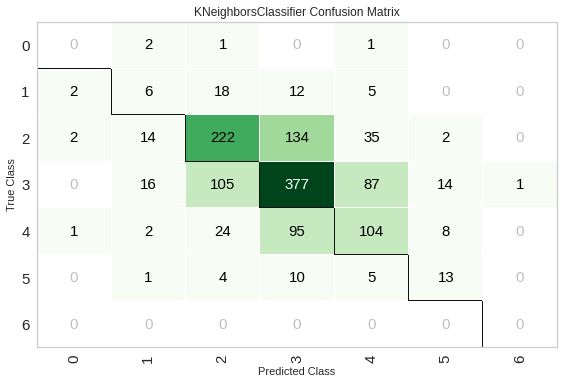

In [17]:
#confusion matrix
plot_model(tuned_knn, plot = 'confusion_matrix')

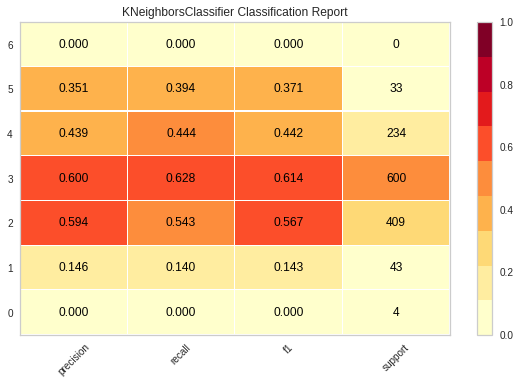

In [18]:
#classification report
plot_model(tuned_knn, plot = 'class_report')

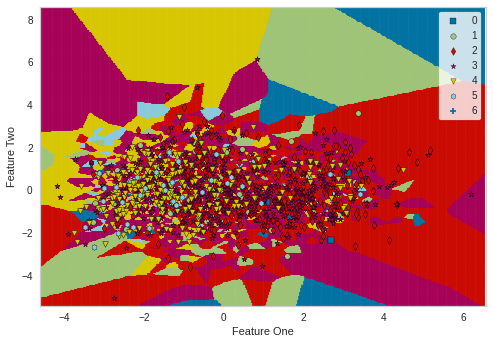

In [19]:
#decision boundary plot
plot_model(tuned_knn, plot='boundary')

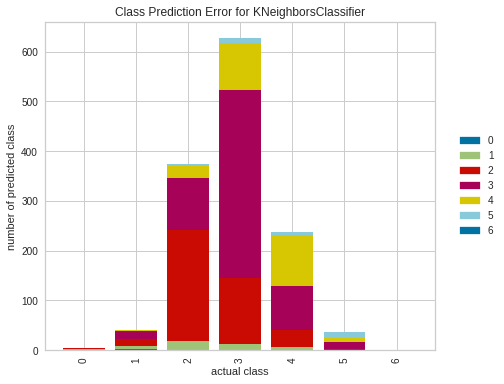

In [20]:
#prediction error plot
plot_model(tuned_knn, plot = 'error')

In [21]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5457,0,0.307,0.5469,0.5458,0.3158,0.3161


In [23]:
final_knn = finalize_model(tuned_knn)

In [24]:
#printing the final k nearest neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


In [25]:
#prediction on unseen data
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,1.0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,1.0
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,5,1.0
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,7,1.0
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,5,1.0


In [26]:
#to save the model
save_model(final_knn,'Final KNN Model 08Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='quality')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

In [27]:
#to load the saved model
saved_final_knn = load_model('Final KNN Model 08Dec2021')


Transformation Pipeline and Model Successfully Loaded


In [28]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [29]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,1.0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,1.0
2,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,5,1.0
3,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,7,1.0
4,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,5,1.0
